In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
#Preparing Data
data = "C:\\Users\\HP\\Desktop\\CanadaRdata.csv"
table = pd.read_csv(data)
table.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [8]:
#Trying to know more information about this data before moving forward to the exploration
table.describe() 

,Year,UNHCR-refugees,Asylum-seekers,total-count
count,1870.000000,1870.000000,1870.000000,1870.000000
mean,2016.955615,752.438503,323.139572,1075.578075
std,3.167123,2427.738942,1181.143362,2980.751399
min,2012.000000,0.000000,0.000000,0.000000
25%,2014.000000,20.000000,7.000000,39.250000
50%,2017.000000,124.000000,36.000000,187.000000
75%,2020.000000,563.750000,195.250000,889.750000
max,2022.000000,75098.000000,19765.000000,75294.000000


In [9]:
#Checking if theres a null Data in the Data
table.isnull().value_counts()

Year   Country-of-origin  UNHCR-refugees  Asylum-seekers  total-count
False  False              False           False           False          1870
Name: count, dtype: int64

In [422]:
#Checking the types of data in the data set
table.dtypes

Year                  int32
Country-of-origin    object
UNHCR-refugees        int64
Asylum-seekers        int64
total-count           int64
dtype: object

In [12]:
#Q1: From which countries has Canada admitted the highest number of refugees

highest_ad_C = table.groupby("Country-of-origin")["UNHCR-refugees"].max()
highest_ad_C=highest_ad_C.reset_index()
highest_ad_C.sort_values(by="UNHCR-refugees", inplace=True, ascending=False)
highest_ad_C.reset_index(drop = True ,inplace = True)
ab = highest_ad_C.head(10)
ab.head()

,Country-of-origin,UNHCR-refugees
0,Ukraine,75098
1,Colombia,17563
2,China,16813
3,Sri Lanka,13705
4,Pakistan,11605


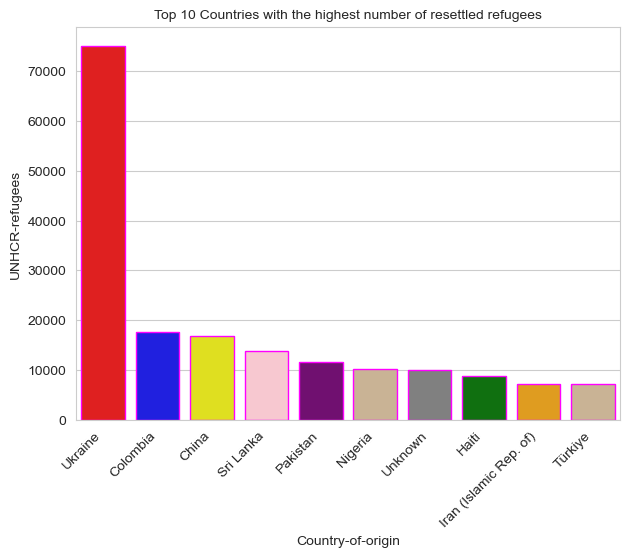

<Figure size 1000x600 with 0 Axes>

In [13]:
#Creating Barchart for the top 10 Countries with the highest number of refugees

sns.barplot(data = ab, x= "Country-of-origin", y=  "UNHCR-refugees", palette= ["red","blue","yellow","pink","purple","tan","grey","green","orange","tan"],hue="Country-of-origin",edgecolor="magenta" )
plt.xlabel("Country-of-origin")
plt.ylabel("UNHCR-refugees")
plt.title("Top 10 Countries with the highest number of resettled refugees",fontsize=10)

#rotate x axis for better visibility
plt.tight_layout()
plt.xticks(rotation=45, ha = "right")
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

plt.show()

In [15]:
#Q2. What's the total number ofrestteled refugees in canada per year

no_of_R = table.groupby("Year")["UNHCR-refugees"].sum()
no_of_R = no_of_R.reset_index()
no_of_R.sort_values(by = "UNHCR-refugees", inplace= True, ascending=False)
no_of_R.head()

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
10,2022,140621
3,2015,135890


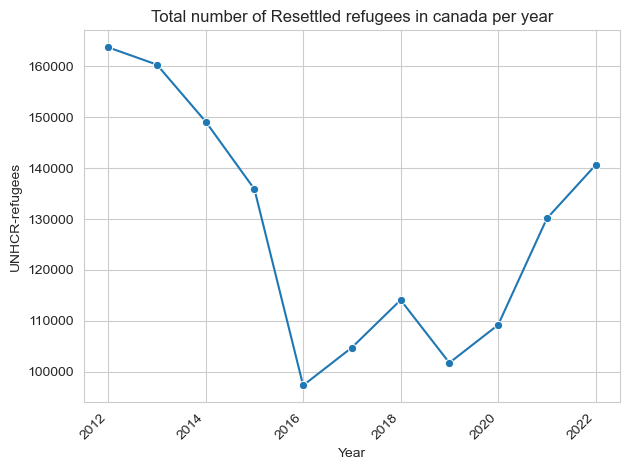

In [43]:
#Creating Line plot to Visualize the total number of Resettled refugees in canada per year

sns.lineplot(data=no_of_R,x="Year", y= "UNHCR-refugees",marker="o")

plt.xlabel("Year")
plt.ylabel("UNHCR-refugees")
plt.title("Total number of Resettled refugees in canada per year")
plt.xticks(rotation=45,ha="right")
sns.set_style("whitegrid")
plt.grid
plt.tight_layout()
plt.show()

In [100]:
#Q3  What are the countries of origin for the majority of asylum claims made in canada


country_of_origin = table.groupby("Country-of-origin")["Asylum-seekers"].sum().reset_index(name="Asylum-seekers")
country_of_origin.sort_values(by = "Asylum-seekers", inplace= True, ascending=False)
country_of_origin.reset_index(drop=True,inplace=True)

c_of_o =country_of_origin.head(10)
c_of_o.head(10)

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


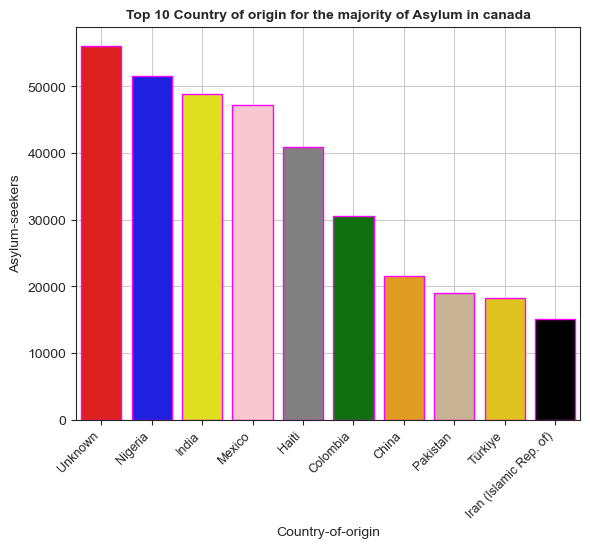

In [48]:
#Creating bar plot to visualize the total number of Asylum-seekers in canada per year


sns.barplot(data=c_of_o, x="Country-of-origin", y="Asylum-seekers",palette= ["red","blue","yellow","pink","grey","green","orange","tan","gold","black"],hue = "Country-of-origin",edgecolor="magenta")
plt.title("Top 10 Country of origin for the majority of Asylum in canada",fontsize=10,fontweight="bold")
plt.grid()
sns.set_style("ticks")
plt.xlabel("Country-of-origin")
plt.ylabel("Asylum-seekers")
plt.tight_layout()
plt.xticks(rotation=45,ha="right",fontsize=9)
plt.show()


In [25]:
#Q4 Total number of Asylum claims made in canada per year

no_of_A = table.groupby("Year")["Asylum-seekers"].sum()
no_of_A = no_of_A.reset_index()
no_of_A.sort_values(by = "Asylum-seekers", inplace= True, ascending=False)

no_of_A.head(10)

,Year,Asylum-seekers
10,2022,113066
7,2019,97017
8,2020,85352
6,2018,78766
9,2021,63143
5,2017,51859
0,2012,32647
4,2016,23946
1,2013,22145
3,2015,19631


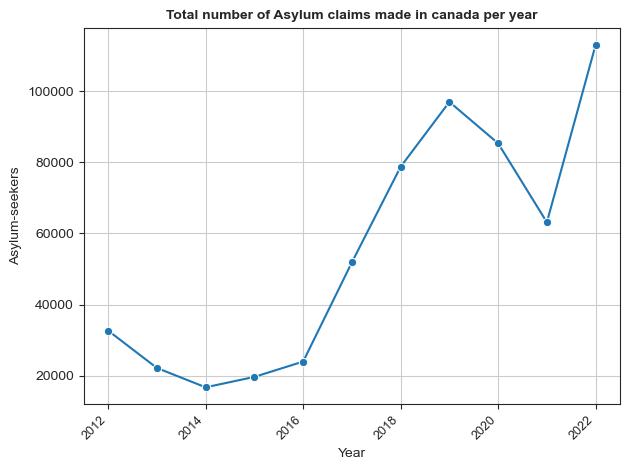

In [53]:
#Creating bar plot to visualize the total number of Asylum-seekers in canada per year

sns.lineplot(data=no_of_A,x="Year", y= "Asylum-seekers",marker="o")


plt.title("Total number of Asylum claims made in canada per year",fontsize=10,fontweight="bold")
plt.xticks(rotation=45,ha="right",fontsize=9)
sns.set_style("ticks")
plt.xlabel("Year")
plt.ylabel("Asylum-seekers")
plt.tight_layout()
plt.grid()
plt.show()


In [114]:
#Q5 
top_countries = table.groupby("Country-of-origin")["total-count"].sum().reset_index(name="total-count")
top_countries.sort_values(by= "total-count",ascending=False)
top10_C=top_countries.head(10)
top10_C.head(10)

,Country-of-origin,total-count
0,Afghanistan,34848
1,Albania,14235
2,Algeria,9947
3,Angola,9638
4,Antigua and Barbuda,1083
5,Argentina,1214
6,Armenia,1304
7,Australia,61
8,Austria,49
9,Azerbaijan,6373


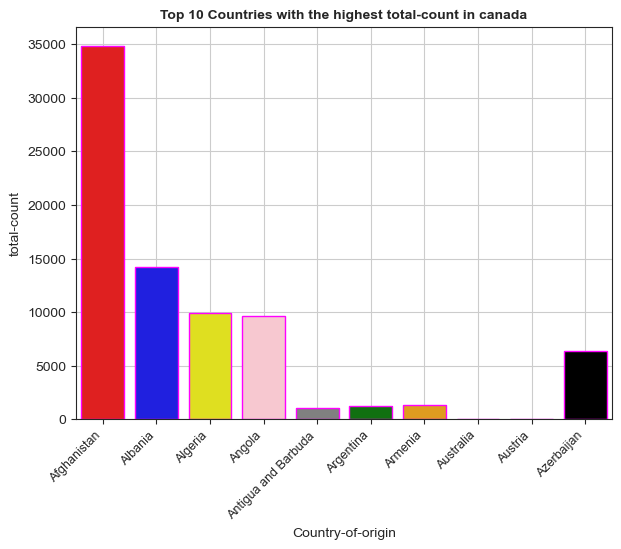

In [118]:
sns.barplot(data = top10_C,x="Country-of-origin" , y="total-count",palette= ["red","blue","yellow","pink","grey","green","orange","tan","gold","black"],hue = "Country-of-origin",edgecolor="magenta")

plt.title("Top 10 Countries with the highest total-count in canada",fontsize=10,fontweight="bold")
plt.grid()
sns.set_style("ticks")
plt.xlabel("Country-of-origin")
plt.ylabel("total-count",fontsize=10)
plt.tight_layout()
plt.xticks(rotation=45,ha="right",fontsize=9)
plt.show()

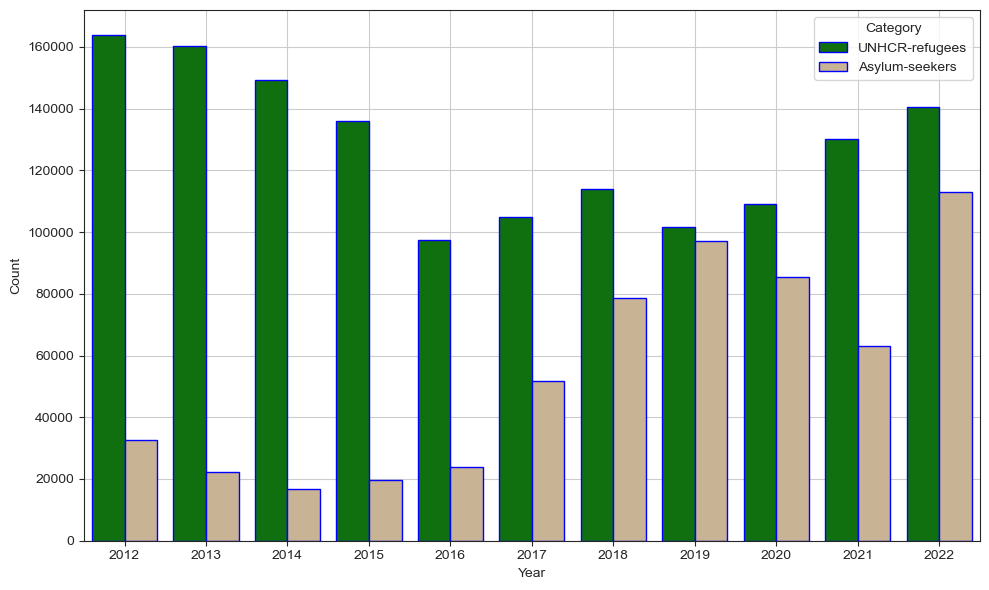

In [159]:
totalYcount= table.groupby("Year")[["UNHCR-refugees","Asylum-seekers"]].sum().reset_index()
melt_data= pd.melt(totalYcount, id_vars=['Year'], var_name='Category', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=melt_data, x='Year', y='Count', hue='Category', palette= ["green","tan"],edgecolor="blue")
plt.tight_layout()
plt.grid()
plt.show()

In [150]:
totalYcount.head(10)

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [68]:
#Q5 

data_grouped = table.groupby("Year").sum()
data_grouped.index.min() 
data_grouped.index.max() 


-1536842502

In [62]:
#Train ARIMA model for forcasting number of refugees that will be in canada in next 6years
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(table["UNHCR-refugees"],
              order=(2,1,2))
model_fit=model.fit()

forecast=model_fit.forecast(steps=5)
forecast.head()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1870    1181.164720
1871     358.799656
1872    1161.288034
1873     377.034135
1874    1143.516048
Name: predicted_mean, dtype: float64

In [5]:
data_grouped = table.groupby("Year").sum()

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

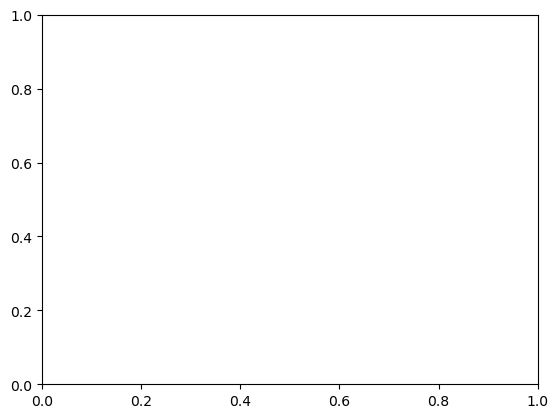

In [356]:
future = list(range(table["Year"].max()+1 ,
table["Year"].max()+5))
plt.plot(future,forecast,marker="o",linestyle="dashed",color="red")